In [1]:
import os
os.chdir('..')

In [7]:
from models import SM_MNL
from models import SM_Nested
from models import LPMC_Full
from models import LPMC_DC
from models import MTMC
from algos import OptAlg

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

sns.set(font_scale=1.5)

data_folder = '../data/'
figures_folder = '../figures/'

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
import biogeme.version as ver
ver.getText()

'biogeme 3.1.1 [January 1, 2019]\nVersion entirely written in Python\nHome page: http://biogeme.epfl.ch\nSubmit questions to https://groups.google.com/d/forum/biogeme\nMichel Bierlaire, Transport and Mobility Laboratory, Ecole Polytechnique Fédérale de Lausanne (EPFL)\n'

In [4]:
model = SM_MNL(data_folder)

In [5]:
ioa = OptAlg(alg_type='LS-ABS', direction='hess')
#ioa = OptAlg(alg_type='TR', direction='hess')

In [6]:
start = time.time()
res = model.optimize(ioa, **{'verbose': True, 
                             'nbr_epochs': 1000, 
                             'batch': 100,
                             'perc_hybrid': 0.3})
stop = time.time()

Maximizing the problem using a Line Search ABS (init batch: 100) IOA with the Hessian direction.
Epoch 0:
  xk = [0.000, 0.000, 0.000, 0.000]
  f(xk) = 1.050
  ||gk|| = 4.778E-01
  stop_crit = 0.000E+00
  ||dir|| = 1.467E+00
  alpha = 1.000E+00

Epoch 0.014775413711583925:
  xk = [-0.041, -0.993, -0.118, -1.073]
  f(xk) = 0.810
  ||gk|| = 1.151E-01
  stop_crit = 6.763E-02
  ||dir|| = 1.227E+00
  alpha = 1.000E+00
  Curr. impr.: 1.53E+01
  # times under thresh: 0

Epoch 0.02955082742316785:
  xk = [0.001, -0.345, -1.114, -1.373]
  f(xk) = 0.758
  ||gk|| = 1.124E-01
  stop_crit = 8.522E-02
  ||dir|| = 6.205E-01
  alpha = 1.000E+00
  Curr. impr.: 7.38E+00
  # times under thresh: 0

Epoch 0.044326241134751775:
  xk = [0.253, -0.766, -0.838, -1.633]
  f(xk) = 0.766
  ||gk|| = 8.374E-02
  stop_crit = 6.304E-02
  ||dir|| = 3.942E-01
  alpha = 1.000E+00
  Curr. impr.: 2.81E+00
  # times under thresh: 0

Epoch 0.0591016548463357:
  xk = [0.505, -0.628, -1.069, -1.494]
  f(xk) = 0.820
  ||gk|| =

Epoch 2.615248226950354:
  xk = [-0.179, -0.742, -1.154, -1.261]
  f(xk) = 0.776
  ||gk|| = 1.380E-02
  stop_crit = 1.907E-02
  ||dir|| = 2.132E-01
  alpha = 1.000E+00
  Curr. impr.: 9.45E-01
  # times under thresh: 2
  -> New batch size of 6400 samples

Epoch 3.560874704491725:
  xk = [-0.096, -0.657, -1.059, -1.410]
  f(xk) = 0.785
  ||gk|| = 1.221E-02
  stop_crit = 1.725E-02
  ||dir|| = 1.268E-01
  alpha = 1.000E+00
  Curr. impr.: 2.67E-01
  # times under thresh: 1

Epoch 4.506501182033096:
  xk = [-0.140, -0.680, -1.135, -1.322]
  f(xk) = 0.789
  ||gk|| = 3.920E-03
  stop_crit = 4.204E-03
  ||dir|| = 8.624E-02
  alpha = 1.000E+00
  Curr. impr.: 1.09E-01
  # times under thresh: 2
  -> New batch size of 6768 samples

Epoch 5.506501182033096:
  xk = [-0.161, -0.707, -1.079, -1.266]
  f(xk) = 0.788
  ||gk|| = 8.247E-04
  stop_crit = 9.277E-04
  ||dir|| = 1.568E-02
  alpha = 1.000E+00

Epoch 6.506501182033096:
  xk = [-0.155, -0.701, -1.084, -1.278]
  f(xk) = 0.788
  ||gk|| = 2.412E-06


In [11]:
res['opti_time']

0.07015252113342285

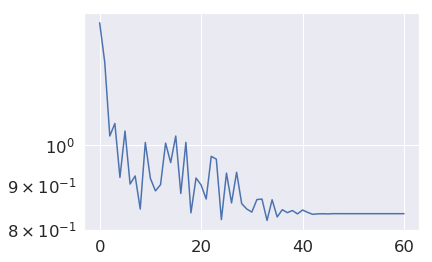

In [12]:
plt.semilogy(ioa.alg_type.abs.f_vals)

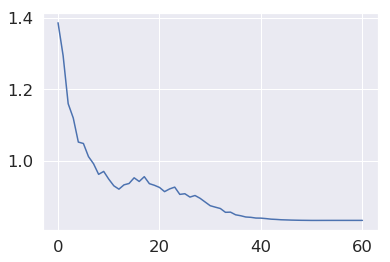

In [13]:
plt.plot(ioa.alg_type.abs.cum_avg)